In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
from IPython.display import Image
# necessary to display images

# UNDER- AND OVER-FITTING

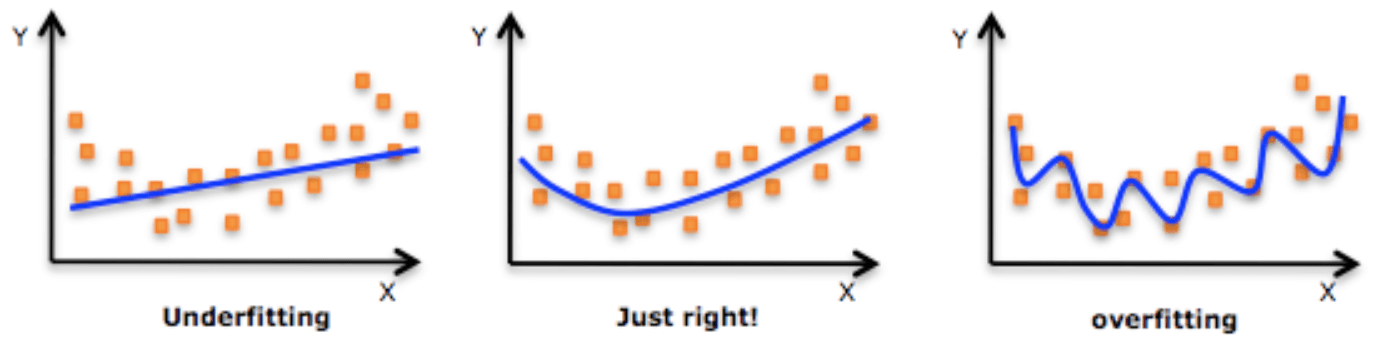

In [3]:
Image(filename="data/Screen-Shot-2018-03-22-at-11.22.15-AM-e1526498075543.png", width=1000)  

## Underfitting

# Overfittign

# KNN - CLASSIFIER

### Creating the dataset for the example

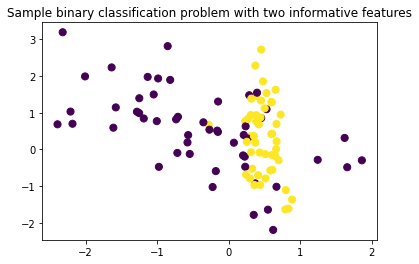

In [4]:
from sklearn.datasets import make_classification
plt.figure()
plt.title('Sample binary classification problem with two informative features')
# this creates 2, bidimensional NP arrays
X_C2, y_C2 = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)
plt.scatter(X_C2[:, 0], X_C2[:, 1], c=y_C2,
           marker= 'o', s=50);

In [11]:
# classifier test

from sklearn.neighbors import KNeighborsClassifier

# creating test train split mixes

X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2)

# creating the classifier
clf = KNeighborsClassifier(n_neighbors=1)

# passing the training parameters
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [12]:
## plottinmg the mesh and scatterplots

# Plot the decision boundary by assigning a color in the color map
# to each mesh point.

mesh_step_size = .01  # step size in the mesh

# both boundaries are created with X becayse what we want is a scatterplot of the 2 relevant featurse
x_min, x_max = X_train[:, 0].min(), X_train[:, 0].max() # create boundaries for X
y_min, y_max = X_train[:, 1].min(), X_train[:, 1].max() # create boundaries for Y

xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),
                     np.arange(y_min, y_max, mesh_step_size)) # create the arrays that contain the full steps of color takes one of each array

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]) 
# first, this "flattens" the arraays via .ravel. Basically, it tranfors all rows and columns into entries in a single column (x * y)
# Then, an X/Y pair is created via np.c. Basically takes 1-1 of each, and concatenates to create a 2D array

Z = Z.reshape(xx.shape) # give the resulting array the same shape as the mesh array

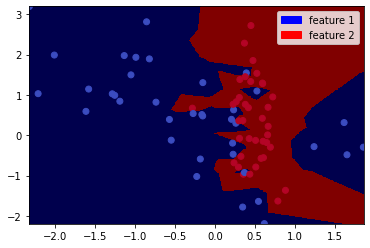

In [27]:
plt.pcolormesh(xx, yy, Z, shading="auto", cmap="seismic") #plots the mesh. Shading auto is mandatory. ## basically, creates a colored grid on every point of x-y.
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap="coolwarm") #plots the scatter plot of the test parameters

#creating patch colors for legend
import matplotlib.patches as mpatches
patch0 = mpatches.Patch(color="blue", label="feature 1")
patch1 = mpatches.Patch(color="red", label="feature 2")

plt.legend(handles=[patch0, patch1]);

# KNN - REGRESSION

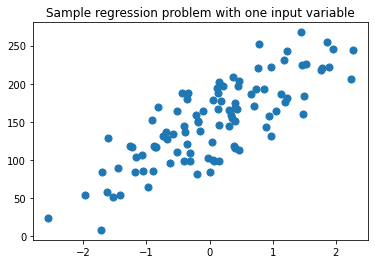

In [32]:
# synthetic dataset for simple regression
from sklearn.datasets import make_regression
plt.figure()
plt.title('Sample regression problem with one input variable')
X_R1, y_R1 = make_regression(n_samples = 100, n_features=1,
                            n_informative=1, bias = 150.0,
                            noise = 30, random_state=0)
plt.scatter(X_R1, y_R1, marker= 'o', s=50)
plt.show()

In [34]:
from sklearn.neighbors import KNeighborsRegressor

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_R1, y_R1)

kreg = KNeighborsRegressor(n_neighbors=5)
kreg.fit(X_train2, y_train2)

KNeighborsRegressor()

In [35]:
kreg.predict(X_test2)

array([214.79372953, 178.62281917, 187.10694748,  90.69856978,
       119.97512071, 233.41209575, 100.81639374, 233.41209575,
       160.23545942, 169.03290809, 158.42611863, 160.23545942,
       192.13755489, 141.04387198, 192.13755489, 169.03290809,
       191.31852674, 233.41209575, 169.03290809, 110.80011597,
       219.65217244, 178.62281917, 131.06865138, 214.37069456,
       110.80011597])

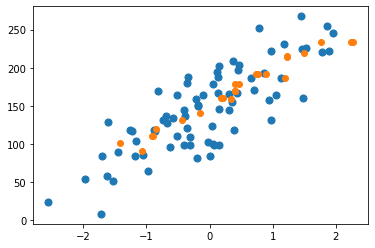

In [41]:
plt.scatter(X_train2, y_train2, marker= 'o', s=50)
plt.scatter(X_test2, kreg.predict(X_test2))